In [1]:
import joblib
import json
import pandas
import numpy
import seaborn

import sklearn.model_selection
import sklearn.neural_network
import sklearn.metrics

import matplotlib.pyplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Instructions

- Read **the train data** from the CSV file and properly set the index


In [2]:
data_train = pandas.read_csv('./data/features.train.csv').set_index('id')
data_train

,education,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_puerto-rico,native-country_outlying-us(guam-usvi-etc),native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,native-country_honduras,label
id,,,,,,,,,,,,,,,,,,,,,
2103,14.0,2.0,14.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14649,8.0,0.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,8.0,2.0,8.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24479,9.0,2.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,1.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,9.0,0.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,9.0,2.0,9.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,8.0,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Instructions

- Split the data into a train data set and a validation data set using `sklearn.model_selection.train_test_split` with the following configurations:
```
    train_size   = 0.75
    shuffle      = True 
    random_state = 0
```


In [3]:
data_train, data_validation = sklearn.model_selection.train_test_split(
    data_train, 
    train_size   = 0.75, 
    shuffle      = True, 
    random_state = 0
)

In [4]:
data_train

,education,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_puerto-rico,native-country_outlying-us(guam-usvi-etc),native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,native-country_honduras,label
id,,,,,,,,,,,,,,,,,,,,,
7714,8.0,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17571,8.0,4.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7396,11.0,1.0,11.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18050,14.0,1.0,14.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4238,8.0,3.0,8.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25557,8.0,1.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13216,10.0,1.0,10.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27271,8.0,2.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
data_validation

,education,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_puerto-rico,native-country_outlying-us(guam-usvi-etc),native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,native-country_honduras,label
id,,,,,,,,,,,,,,,,,,,,,
24718,8.0,2.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11076,9.0,4.0,9.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22843,13.0,2.0,13.0,4.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13603,12.0,2.0,12.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20298,13.0,1.0,13.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18278,12.0,3.0,12.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22533,12.0,4.0,12.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5101,12.0,3.0,12.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Instructions

- Instantiate a `sklearn.neural_network.MLPClassifier` model with the following configurations
```
    hidden_layer_sizes    = (20, 10),
    solver                = 'sgd', 
    activation            = 'logistic',
    alpha                 = 0.0,  
    batch_size            = 32,
    learning_rate         = 'constant',
    learning_rate_init    = 0.1,
    max_iter              = 1000,
    momentum              = 0.0, 
    nesterovs_momentum    = False, 
    validation_fraction   = 0.0, 
    shuffle               = True,
    random_state          = 0
```


In [6]:
model = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes    = (20, 10),
    solver                = 'sgd', 
    activation            = 'logistic',
    alpha                 = 0.0,  
    batch_size            = 32,
    learning_rate         = 'constant',
    learning_rate_init    = 0.1,
    max_iter              = 1000,
    momentum              = 0.0, 
    nesterovs_momentum    = False, 
    validation_fraction   = 0.0, 
    shuffle               = True,
    random_state          = 0
)

# Instructions

- This part is to train the model while recording the losses and scores of both training and validation data sets
  - For each training iteration, use `partial_fit` to fit the model with the training data
  - Save the model that has the minimum validation loss
- Extend the following code base to append various metrics from partially trained models to `training_results`

```
data_train_features      = data_train.drop(['label'], axis='columns')
data_train_labels        = data_train['label']

data_validation_features = data_validation.drop(['label'], axis='columns')
data_validation_labels   = data_validation['label']

best_nll_validation = numpy.inf
training_results = []

for i in range(1, 400):

    model.partial_fit(
        X       = data_train_features,
        y       = data_train_labels,
        classes = [0, 1]
    )
    
    # insert code here
    nll_train = ...
    f1_train = ...
    nll_validation = ...
    f1_validation = ...

    training_results.append({
        'iter'            : i,
        'nll_train'       : nll_train,
        'f1_train'        : f1_train,
        'nll_validation'  : nll_validation,
        'f1_validation'   : f1_validation,
    })
        
    if nll_validation < best_nll_validation:
        best_nll_validation = nll_validation
        joblib.dump(model, './model/model.joblib')
        

training_results = pandas.DataFrame(training_results).set_index('iter')

```

In [7]:
data_train_features      = data_train.drop(['label'], axis='columns')
data_train_labels        = data_train['label']

data_validation_features = data_validation.drop(['label'], axis='columns')
data_validation_labels   = data_validation['label']

best_nll_validation = numpy.inf
training_results = []

# Training iteration (partial fit)
for i in range(1, 400):

    model.partial_fit(
        X       = data_train_features,
        y       = data_train_labels,
        classes = [0, 1]
    )
    
    # insert code here
    # Loss and f1 score of training set
    
    nll_train = sklearn.metrics.log_loss(
        y_true = data_train_labels,
        y_pred = model.predict_proba(data_train_features)
    )
    
    f1_train = sklearn.metrics.f1_score(
        y_true = data_train_labels,
        y_pred = model.predict(data_train_features)
    )
    
    # Loss and f1 score of testing set
    
    nll_validation = sklearn.metrics.log_loss(
        y_true = data_validation_labels,
        y_pred = model.predict_proba(data_validation_features)
    ) 
    
    f1_validation = sklearn.metrics.f1_score(
        y_true = data_validation_labels,
        y_pred = model.predict(data_validation_features)
    )

    training_results.append({
        'iter'            : i,
        'nll_train'       : nll_train,
        'f1_train'        : f1_train,
        'nll_validation'  : nll_validation,
        'f1_validation'   : f1_validation,
    })
        
    if nll_validation < best_nll_validation:
        best_nll_validation = nll_validation
        joblib.dump(model, './model/model_ANN_drop_na.joblib')
        # joblib.dump(model, './model/model_iter_{}.joblib'.format(i))
    # else:
    #     no_improvements +=1

    
        

training_results = pandas.DataFrame(training_results).set_index('iter')

In [8]:
training_results

,nll_train,f1_train,nll_validation,f1_validation
iter,,,,
1,0.675355,0.000000,0.675552,0.000000
2,0.638918,0.154910,0.639642,0.141064
3,0.499511,0.732633,0.498632,0.736877
4,0.462592,0.683304,0.457890,0.681905
5,0.471080,0.658808,0.465906,0.651461
...,...,...,...,...
395,0.355404,0.806655,0.378634,0.790982
396,0.355366,0.806613,0.378663,0.790982
397,0.355328,0.807036,0.378691,0.791251


# Instructions

- Plot the `nll_train` and `nll_validation` against `iter`
- Plot the `f1_train` and `f1_validation` against `iter`
- Find the training iteration that achieves the minimum validation loss
  - Hint: use `.idxmin` on `nll_validation`
- Also, use `.get_params`, `json.dump` to save the model configuration to  `./model/config.json`


<Axes: xlabel='iter', ylabel='nll_train'>

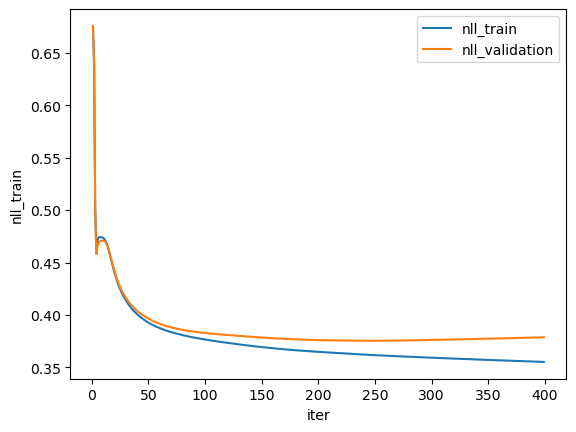

In [9]:
seaborn.lineplot(
    data = training_results,
    x = 'iter',
    y = 'nll_train',
    label = 'nll_train'
)

seaborn.lineplot(
    data = training_results,
    x = 'iter',
    y = 'nll_validation',
    label = 'nll_validation'
)

<Axes: xlabel='iter', ylabel='f1_train'>

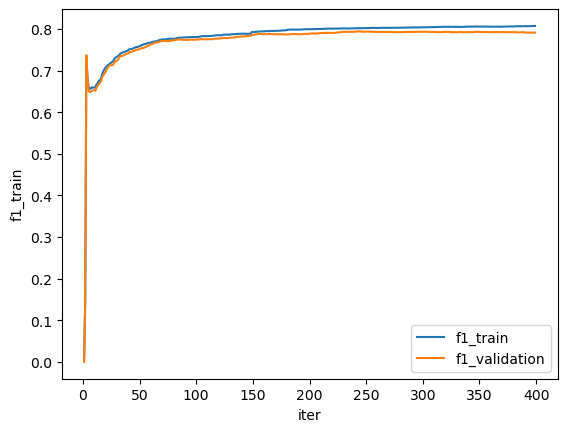

In [10]:
seaborn.lineplot(
    data = training_results,
    x = 'iter',
    y = 'f1_train',
    label = 'f1_train'
)

seaborn.lineplot(
    data = training_results,
    x = 'iter',
    y = 'f1_validation',
    label = 'f1_validation'
)

In [11]:
training_results['nll_validation'].idxmin()

249

In [12]:
training_results.loc[185:195]

,nll_train,f1_train,nll_validation,f1_validation
iter,,,,
185,0.365966,0.798223,0.376509,0.787720
186,0.365887,0.798527,0.376471,0.787720
187,0.365810,0.798181,0.376435,0.787463
188,0.365733,0.798225,0.376400,0.787463
189,0.365657,0.798225,0.376366,0.787206
190,0.365581,0.798268,0.376333,0.787206
191,0.365507,0.798398,0.376301,0.787088
192,0.365433,0.798442,0.376270,0.787088
193,0.365360,0.798442,0.376240,0.787088


In [13]:
with open('./model/config.json', 'w') as f:
    json.dump(model.get_params(), f, indent=4)